# 1. Import Libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import scipy
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.feature_selection import SelectKBest, mutual_info_classif, chi2
from sklearn.preprocessing import LabelEncoder
import datetime
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# 2. Loading dataset

In [2]:
df = pd.read_excel('RTA.xlsx')

# 3. Data Inspection : Overview the Structure and Content of Your Dataset

In [3]:
df.head()

,S/N0,time,day,driv_age,sex,driv_expe,type_of_vehcle,service_year,location,road_cond,light_cond,weather_cond,casuality_class,causality_age,causality_sex,severity
0,1,20:00:00,Saturday,27.0,male,6.0,bus,9.0,orgn,dry,darkness,cold,NaN,52.0,male,serious
1,2,20:00:00,Saturday,40.0,male,NaN,automobile,24.0,orgn,dry,darkness,cold,NaN,32.0,male,serious
2,3,10:30:00,Thursday,27.0,male,NaN,truck,3.0,orgn,dry,daylight,sunlight,pedistrian,20.0,male,serious
3,4,NaN,Saturday,27.0,male,NaN,truck,10.0,market,dry,daylight,cold,prodamage,55.0,male,serious
4,5,08:10:00,Sunday,45.0,male,NaN,automobile,10.0,Station,dry,daylight,sunlight,pedistrian,25.0,male,serious


In [4]:
df.tail()

,S/N0,time,day,driv_age,sex,driv_expe,type_of_vehcle,service_year,location,road_cond,light_cond,weather_cond,casuality_class,causality_age,causality_sex,severity
105,106,17:30:00,Monday,30.0,male,9.0,bus,1.0,orgn,dry,daylight,good,prodamage,30.0,male,serious
106,107,12:05:00,Tuesday,32.0,male,3.0,bus,10.0,orgn,dry,daylight,good,prodamage,21.0,male,serious
107,108,22:00:00,Thursday,26.0,male,5.0,automobile,10.0,orgn,dry,nightlight,good,prodamage,23.0,male,serious
108,109,10:30:00,Monday,37.0,male,5.0,automobile,10.0,orgn,dry,daylight,good,prodamage,48.0,male,serious
109,110,14:00:00,Saturday,45.0,male,30.0,automobile,1.0,market,dry,daylight,good,prodamage,51.0,male,serious


In [5]:
df.shape

(110, 16)

In [6]:
df.describe()

,S/N0,driv_age,driv_expe,service_year,causality_age
count,110.000000,104.000000,76.000000,96.000000,103.000000
mean,55.500000,34.278846,9.592105,9.500000,39.038835
std,31.898276,10.351546,7.831862,4.523622,16.004241
min,1.000000,16.000000,0.000000,1.000000,7.000000
25%,28.250000,27.000000,5.000000,9.750000,28.000000
50%,55.500000,31.000000,7.000000,10.000000,35.000000
75%,82.750000,40.000000,10.000000,10.000000,50.000000
max,110.000000,59.000000,35.000000,25.000000,85.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110 entries, 0 to 109
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   S/N0             110 non-null    int64  
 1   time             106 non-null    object 
 2   day              110 non-null    object 
 3   driv_age         104 non-null    float64
 4   sex              106 non-null    object 
 5   driv_expe        76 non-null     float64
 6   type_of_vehcle   99 non-null     object 
 7   service_year     96 non-null     float64
 8   location         106 non-null    object 
 9   road_cond        107 non-null    object 
 10  light_cond       104 non-null    object 
 11  weather_cond     110 non-null    object 
 12  casuality_class  94 non-null     object 
 13  causality_age    103 non-null    float64
 14  causality_sex    105 non-null    object 
 15  severity         108 non-null    object 
dtypes: float64(4), int64(1), object(11)
memory usage: 13.9+ KB


In [8]:
df.isnull().sum()

S/N0                0
time                4
day                 0
driv_age            6
sex                 4
driv_expe          34
type_of_vehcle     11
service_year       14
location            4
road_cond           3
light_cond          6
weather_cond        0
casuality_class    16
causality_age       7
causality_sex       5
severity            2
dtype: int64

In [9]:
df.duplicated().sum()

0

# Assess Class Imbalance:

In [10]:
# Step 1: Check distribution of classes in the target column
target_counts = df['severity '].value_counts()
print("Class distribution in the target column:\n", target_counts)

# Step 2: Calculate class imbalance ratio (optional)
imbalance_ratio = target_counts.min() / target_counts.max()
print("Class imbalance ratio:", imbalance_ratio)

Class distribution in the target column:
 severity 
serious    103
fatal        5
Name: count, dtype: int64
Class imbalance ratio: 0.04854368932038835


# Visualizing Class Imbalance

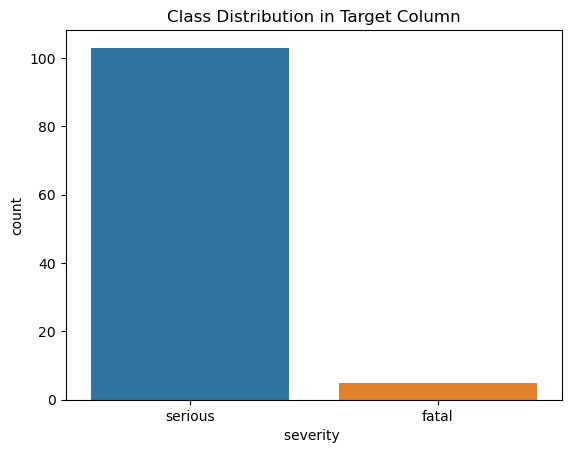

In [11]:
# Plot the class distribution
sns.countplot(data=df, x='severity ')
plt.title('Class Distribution in Target Column')
plt.show()

# 4. Visualize Actual Dataset Before Applying any Data Preprocessing Techniques

In [12]:
print("\nColumn Names:")
print(df.columns)


Column Names:
Index(['S/N0', 'time', 'day', 'driv_age', 'sex ', 'driv_expe',
       'type_of_vehcle', 'service_year ', 'location', 'road_cond',
       'light_cond', 'weather_cond ', 'casuality_class', 'causality_age ',
       'causality_sex', 'severity '],
      dtype='object')


# A. Categorical Variables Analysis

In [13]:
print(df.columns)
df.columns = df.columns.str.strip()  # Remove leading/trailing spaces


Index(['S/N0', 'time', 'day', 'driv_age', 'sex ', 'driv_expe',
       'type_of_vehcle', 'service_year ', 'location', 'road_cond',
       'light_cond', 'weather_cond ', 'casuality_class', 'causality_age ',
       'causality_sex', 'severity '],
      dtype='object')


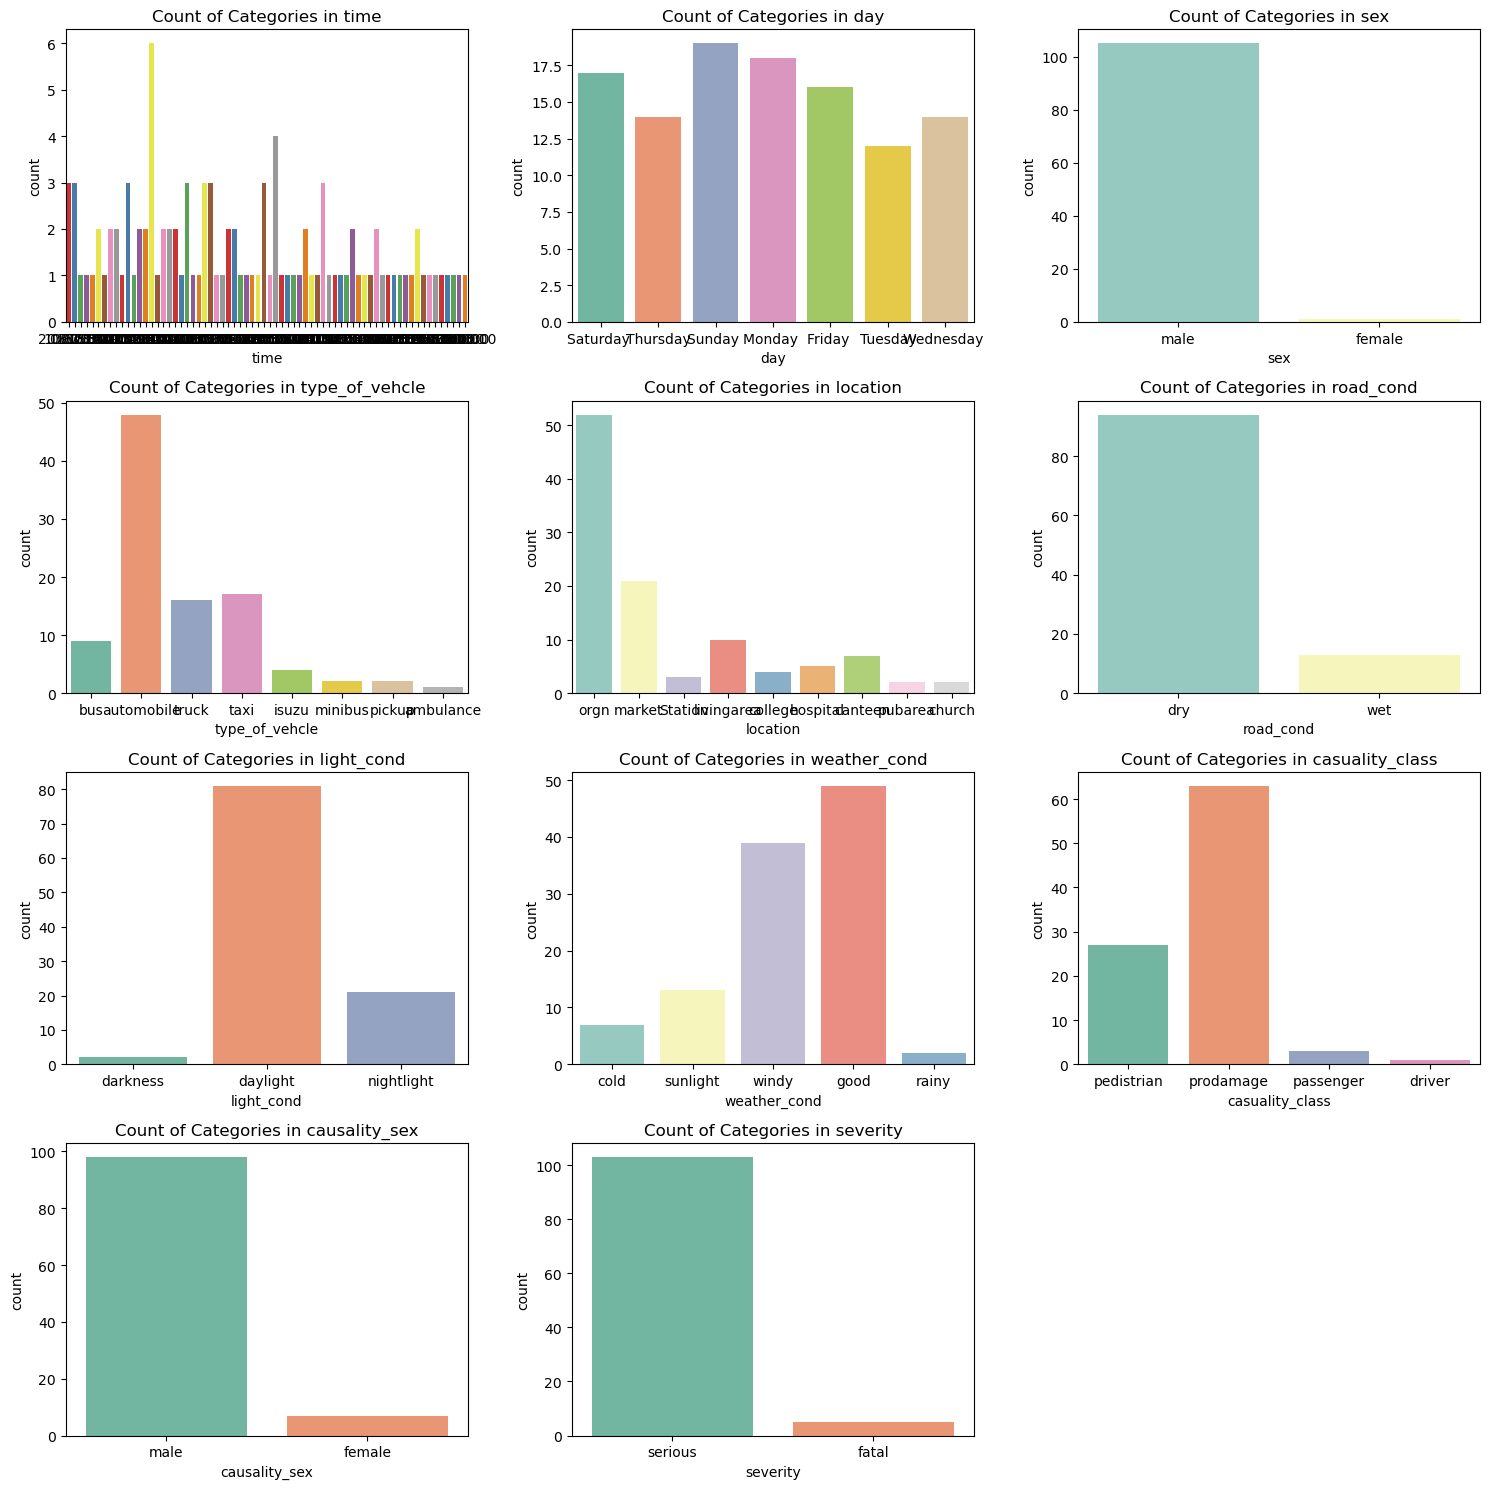

In [14]:
# The code plt.figure(figsize=(15, 15)) creates a new figure with a specified size of 15x15 inches.
#This is useful for adjusting the overall layout of multiple plots, 
#ensuring they fit comfortably within the figure space and are easy to view.
plt.figure(figsize=(15, 15))

plt.subplot(4, 3, 1)
sns.countplot(data=df, x='time', palette='Set1')
plt.title('Count of Categories in time')

plt.subplot(4, 3, 2)
sns.countplot(data=df, x='day', palette='Set2')
plt.title('Count of Categories in day')

plt.subplot(4, 3, 3)
sns.countplot(data=df, x='sex', palette='Set3')  
plt.title('Count of Categories in sex')

plt.subplot(4, 3, 4)
sns.countplot(data=df, x='type_of_vehcle', palette='Set2')
plt.title('Count of Categories in type_of_vehcle')

plt.subplot(4, 3, 5)
sns.countplot(data=df, x='location', palette='Set3')
plt.title('Count of Categories in location')

plt.subplot(4, 3, 6)
sns.countplot(data=df, x='road_cond', palette='Set3')
plt.title('Count of Categories in road_cond')

plt.subplot(4, 3, 7)
sns.countplot(data=df, x='light_cond', palette='Set2')
plt.title('Count of Categories in light_cond')

plt.subplot(4, 3, 8)
sns.countplot(data=df, x='weather_cond', palette='Set3')
plt.title('Count of Categories in weather_cond')

plt.subplot(4, 3, 9)
sns.countplot(data=df, x='casuality_class', palette='Set2')
plt.title('Count of Categories in casuality_class')

plt.subplot(4, 3, 10)
sns.countplot(data=df, x='causality_sex', palette='Set2')
plt.title('Count of Categories in causality_sex')

plt.subplot(4, 3, 11)
sns.countplot(data=df, x='severity', palette='Set2')
plt.title('Count of Categories in severity')


plt.tight_layout()
plt.show()


# B. Numerical Variables Analysis

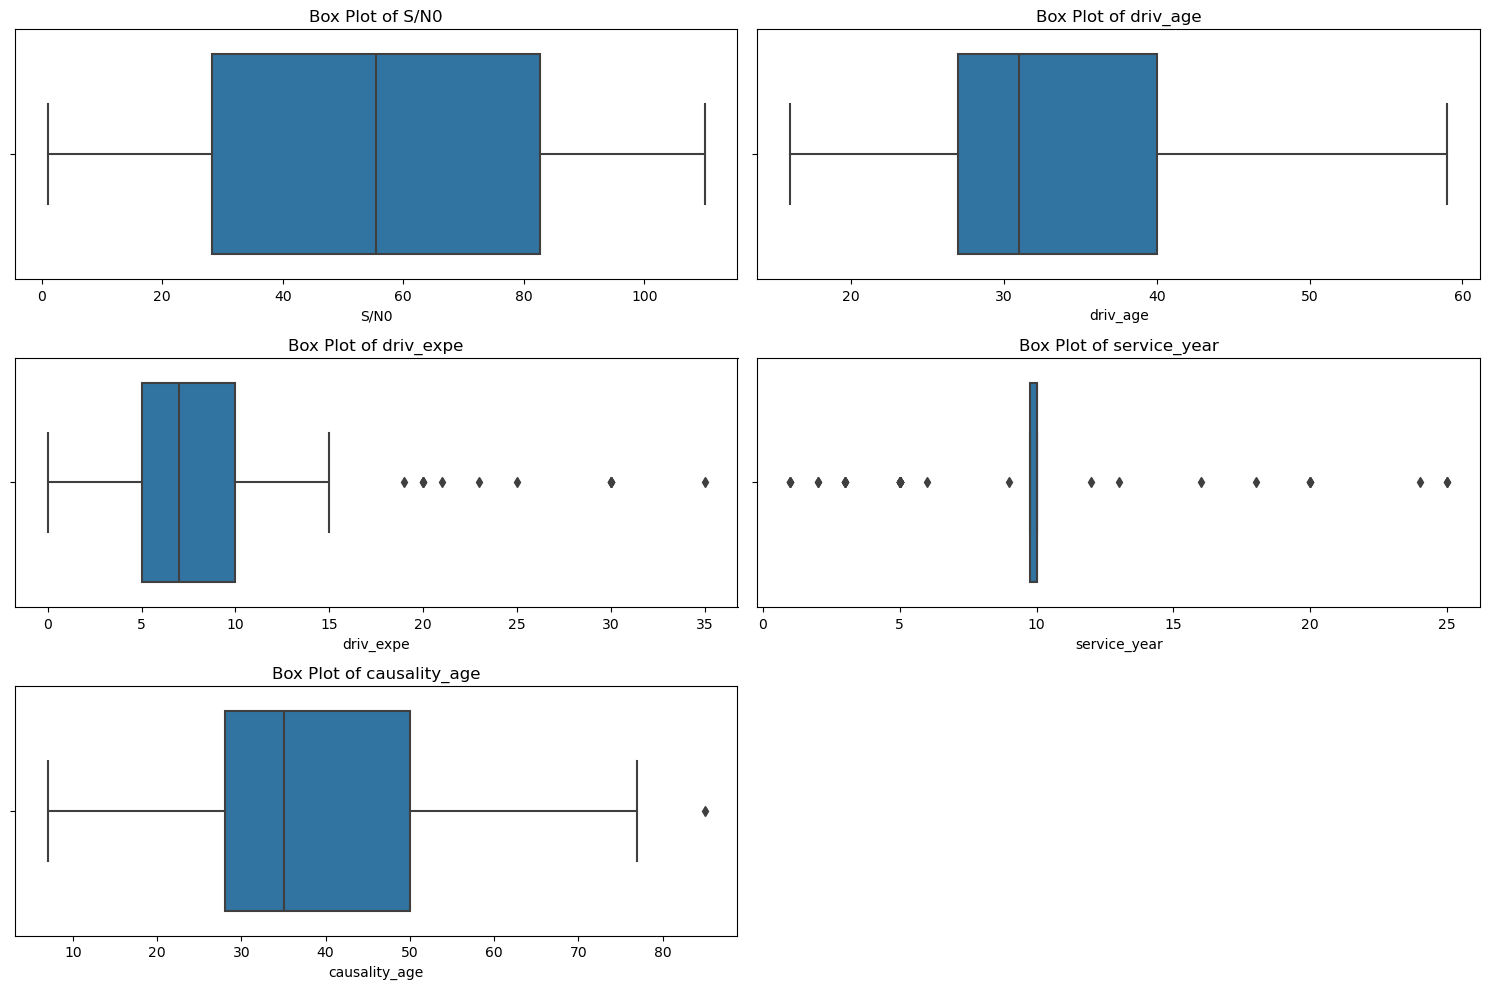

In [15]:
plt.figure(figsize=(15, 10))

# Box plots to visualize outliers
for i, col in enumerate(df.select_dtypes(include=[np.number]).columns, 1):
    plt.subplot(3, 2, i)
    sns.boxplot(x=df[col])
    plt.title(f'Box Plot of {col}')

plt.tight_layout()
plt.show()

In [16]:
print((df.select_dtypes(include='number') < 0).sum()) # find the total number of negative values in our dataset

S/N0             0
driv_age         0
driv_expe        0
service_year     0
causality_age    0
dtype: int64


# 5. Data Preprocessing

# Data Cleaning

In [19]:
df.columns = df.columns.str.strip()  # Removes any extra spaces
df = df.drop('S/N0', axis=1)

In [20]:
print("\nColumn Names:")
print(df.columns)


Column Names:
Index(['time', 'day', 'driv_age', 'sex', 'driv_expe', 'type_of_vehcle',
       'service_year', 'location', 'road_cond', 'light_cond', 'weather_cond',
       'casuality_class', 'causality_age', 'causality_sex', 'severity'],
      dtype='object')


In [21]:
# Detailed check for missing values in the first 110 rows
for index in range(110):
     if index < len(df):  # Ensure index is within the DataFrame's length
        row_data = df.iloc[index]
        missing_mask = row_data.isnull()
        
        if missing_mask.any():  # Check if there are any missing values in this row
            # Get the names of the columns with missing values
            missing_columns = row_data[missing_mask].index.tolist()
            
            # Calculate the percentage of missing values for this row
            total_columns = len(row_data)
            missing_count = missing_mask.sum()
            missing_percentage = (missing_count / total_columns) * 100
            
            print(f"Row index {index} has missing values in columns: {missing_columns}")
            print(f"Percentage of missing values in row {index}: {missing_percentage:.2f}%")
            print("----------------------------------------")


Row index 0 has missing values in columns: ['casuality_class']
Percentage of missing values in row 0: 6.67%
----------------------------------------
Row index 1 has missing values in columns: ['driv_expe', 'casuality_class']
Percentage of missing values in row 1: 13.33%
----------------------------------------
Row index 2 has missing values in columns: ['driv_expe']
Percentage of missing values in row 2: 6.67%
----------------------------------------
Row index 3 has missing values in columns: ['time', 'driv_expe']
Percentage of missing values in row 3: 13.33%
----------------------------------------
Row index 4 has missing values in columns: ['driv_expe']
Percentage of missing values in row 4: 6.67%
----------------------------------------
Row index 5 has missing values in columns: ['driv_expe']
Percentage of missing values in row 5: 6.67%
----------------------------------------
Row index 6 has missing values in columns: ['driv_expe', 'light_cond']
Percentage of missing values in row 

# Fill Missing Values

# A. Fill categorical columns with the mode (most common value)

In [22]:
# Fill categorical columns with the mode (most common value)
categorical_cols = df.select_dtypes(include=['object']).columns
df[categorical_cols] = df[categorical_cols].apply(lambda x: x.fillna(x.mode()[0]))

print("DataFrame after filling missing values:")
print(df)

DataFrame after filling missing values:
         time        day  driv_age   sex  driv_expe type_of_vehcle  \
0    20:00:00  Saturday       27.0  male        6.0            bus   
1    20:00:00  Saturday       40.0  male        NaN     automobile   
2    10:30:00   Thursday      27.0  male        NaN          truck   
3    14:00:00  Saturday       27.0  male        NaN          truck   
4    08:10:00    Sunday       45.0  male        NaN     automobile   
..        ...        ...       ...   ...        ...            ...   
105  17:30:00    Monday       30.0  male        9.0            bus   
106  12:05:00    Tuesday      32.0  male        3.0            bus   
107  22:00:00   Thursday      26.0  male        5.0     automobile   
108  10:30:00    Monday       37.0  male        5.0     automobile   
109  14:00:00  Saturday       45.0  male       30.0     automobile   

     service_year location road_cond  light_cond weather_cond casuality_class  \
0             9.0     orgn       dry  

# B. Fill numerical columns with the mean of each column

In [23]:
# Fill numerical columns with the mean of each column
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
df[numerical_cols] = df[numerical_cols].fillna(df[numerical_cols].mean())

print("DataFrame after filling missing values:")
print(df)

DataFrame after filling missing values:
         time        day  driv_age   sex  driv_expe type_of_vehcle  \
0    20:00:00  Saturday       27.0  male   6.000000            bus   
1    20:00:00  Saturday       40.0  male   9.592105     automobile   
2    10:30:00   Thursday      27.0  male   9.592105          truck   
3    14:00:00  Saturday       27.0  male   9.592105          truck   
4    08:10:00    Sunday       45.0  male   9.592105     automobile   
..        ...        ...       ...   ...        ...            ...   
105  17:30:00    Monday       30.0  male   9.000000            bus   
106  12:05:00    Tuesday      32.0  male   3.000000            bus   
107  22:00:00   Thursday      26.0  male   5.000000     automobile   
108  10:30:00    Monday       37.0  male   5.000000     automobile   
109  14:00:00  Saturday       45.0  male  30.000000     automobile   

     service_year location road_cond  light_cond weather_cond casuality_class  \
0             9.0     orgn       dry  

# Checking missing if missed value had in our dataset after fill missed values

In [24]:
df.isnull().sum()

time               0
day                0
driv_age           0
sex                0
driv_expe          0
type_of_vehcle     0
service_year       0
location           0
road_cond          0
light_cond         0
weather_cond       0
casuality_class    0
causality_age      0
causality_sex      0
severity           0
dtype: int64

# II. Checking Noise and Anomalies

In [25]:
# Show unique items in each column
for column in df.columns:
    unique_values = df[column].unique()  # Get unique values for the column
    print(f"Unique values in '{column}': {unique_values}")

Unique values in 'time': [datetime.time(20, 0) datetime.time(10, 30) datetime.time(14, 0)
 datetime.time(8, 10) datetime.time(16, 50) datetime.time(7, 15)
 datetime.time(18, 30) datetime.time(13, 50) datetime.time(15, 30)
 datetime.time(17, 30) datetime.time(20, 15) datetime.time(12, 0)
 datetime.time(19, 0) datetime.time(7, 30) datetime.time(18, 20)
 datetime.time(11, 40) datetime.time(23, 30) datetime.time(16, 30)
 datetime.time(7, 20) datetime.time(0, 40) datetime.time(11, 0)
 datetime.time(7, 0) datetime.time(13, 20) datetime.time(22, 15)
 datetime.time(17, 0) datetime.time(21, 15) datetime.time(10, 20)
 datetime.time(12, 5) datetime.time(13, 15) datetime.time(20, 40)
 datetime.time(13, 0) datetime.time(9, 30) datetime.time(11, 20)
 datetime.time(11, 30) datetime.time(16, 45) datetime.time(9, 0)
 datetime.time(22, 35) datetime.time(21, 0) datetime.time(17, 10)
 datetime.time(7, 40) datetime.time(22, 0) datetime.time(12, 20)
 datetime.time(12, 30) datetime.time(14, 30) datetime.time

# Handle Noise in Numerical Data

In [26]:
df = pd.DataFrame(df)
# Step 2: Handle Noise in Numerical Data
# Remove outliers from numerical columns using IQR
def remove_outliers_iqr(df):
    for col in df.select_dtypes(include=[np.number]).columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

# Remove outliers using IQR
df_no_outliers = remove_outliers_iqr(df)

 #Print the cleaned DataFrame
print("Data after handling noise and outliers:")
print(df_no_outliers)

Data after handling noise and outliers:
         time        day  driv_age   sex  driv_expe type_of_vehcle  \
0    20:00:00  Saturday       27.0  male   6.000000            bus   
3    14:00:00  Saturday       27.0  male   9.592105          truck   
4    08:10:00    Sunday       45.0  male   9.592105     automobile   
7    18:30:00    Monday       36.0  male   9.592105          truck   
8    13:50:00    Monday       34.0  male   9.592105     automobile   
..        ...        ...       ...   ...        ...            ...   
102  23:00:00  Saturday       27.0  male   8.000000          isuzu   
104  06:00:00  Saturday       30.0  male   2.000000     automobile   
106  12:05:00    Tuesday      32.0  male   3.000000            bus   
107  22:00:00   Thursday      26.0  male   5.000000     automobile   
108  10:30:00    Monday       37.0  male   5.000000     automobile   

     service_year    location road_cond  light_cond weather_cond  \
0             9.0        orgn       dry    darkness

# 6. Data Transformation / Encoding

In [27]:
df = pd.DataFrame(df)

# Function to convert datetime.time to float (hours)
def time_to_float(t):
    if isinstance(t, datetime.time):  # Check if t is a datetime.time object
        total_hours = t.hour + t.minute / 60.0
        return total_hours
    else:
        return None  # Handle other cases (like None)

# Apply the conversion function to the time column
df['time'] = df['time'].apply(time_to_float)

# Display the DataFrame with the new float column
print(df)

          time        day  driv_age   sex  driv_expe type_of_vehcle  \
0    20.000000  Saturday       27.0  male   6.000000            bus   
1    20.000000  Saturday       40.0  male   9.592105     automobile   
2    10.500000   Thursday      27.0  male   9.592105          truck   
3    14.000000  Saturday       27.0  male   9.592105          truck   
4     8.166667    Sunday       45.0  male   9.592105     automobile   
..         ...        ...       ...   ...        ...            ...   
105  17.500000    Monday       30.0  male   9.000000            bus   
106  12.083333    Tuesday      32.0  male   3.000000            bus   
107  22.000000   Thursday      26.0  male   5.000000     automobile   
108  10.500000    Monday       37.0  male   5.000000     automobile   
109  14.000000  Saturday       45.0  male  30.000000     automobile   

     service_year location road_cond  light_cond weather_cond casuality_class  \
0             9.0     orgn       dry    darkness         cold     

# A Encoding Categorical Variables

In [28]:
# Initialize the label encoder
label_encoder = LabelEncoder()

# Loop through each categorical column and apply label encoding
categorical_cols = df.select_dtypes(include=['object']).columns

for col in categorical_cols:
    df[col] = label_encoder.fit_transform(df[col])

print(df)

          time  day  driv_age  sex  driv_expe  type_of_vehcle  service_year  \
0    20.000000    2      27.0    1   6.000000               2           9.0   
1    20.000000    2      40.0    1   9.592105               1          24.0   
2    10.500000    4      27.0    1   9.592105               7           3.0   
3    14.000000    2      27.0    1   9.592105               7          10.0   
4     8.166667    3      45.0    1   9.592105               1          10.0   
..         ...  ...       ...  ...        ...             ...           ...   
105  17.500000    1      30.0    1   9.000000               2           1.0   
106  12.083333    5      32.0    1   3.000000               2          10.0   
107  22.000000    4      26.0    1   5.000000               1          10.0   
108  10.500000    1      37.0    1   5.000000               1          10.0   
109  14.000000    2      45.0    1  30.000000               1           1.0   

     location  road_cond  light_cond  weather_cond 

# B. Normalization (Min-Max Scaling): Rescale features to a [0, 1] range.

In [29]:
# Initialize the scaler
scaler = MinMaxScaler()

# Select only numerical columns
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Normalize the numerical data
df_normalized = df.copy()  # Create a copy to preserve original DataFrame
df_normalized[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# Display the normalized DataFrame
print("\nNormalized DataFrame:")
print(df_normalized)


Normalized DataFrame:
         time  day  driv_age  sex  driv_expe  type_of_vehcle  service_year  \
0    0.846715    2  0.255814    1   0.171429               2      0.333333   
1    0.846715    2  0.558140    1   0.274060               1      0.958333   
2    0.430657    4  0.255814    1   0.274060               7      0.083333   
3    0.583942    2  0.255814    1   0.274060               7      0.375000   
4    0.328467    3  0.674419    1   0.274060               1      0.375000   
..        ...  ...       ...  ...        ...             ...           ...   
105  0.737226    1  0.325581    1   0.257143               2      0.000000   
106  0.500000    5  0.372093    1   0.085714               2      0.375000   
107  0.934307    4  0.232558    1   0.142857               1      0.375000   
108  0.430657    1  0.488372    1   0.142857               1      0.375000   
109  0.583942    2  0.674419    1   0.857143               1      0.000000   

     location  road_cond  light_cond  we

In [30]:
# Prepare your features and target variable
X = df.drop('severity', axis=1)  # Features
y = df['severity']  # Target

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE with a lower k_neighbors
smote = SMOTE(random_state=42, k_neighbors=2)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Train a Random Forest Classifier
model = RandomForestClassifier()
model.fit(X_resampled, y_resampled)

# Evaluate the model
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.95      0.95      0.95        21

    accuracy                           0.91        22
   macro avg       0.48      0.48      0.48        22
weighted avg       0.91      0.91      0.91        22



In [31]:
# Step 1: Check distribution of classes in the target column
target_counts = df['severity'].value_counts()
print("Class distribution in the target column:\n", target_counts)

# Step 2: Calculate class imbalance ratio (optional)
imbalance_ratio = target_counts.min() / target_counts.max()
print("Class imbalance ratio:", imbalance_ratio)

Class distribution in the target column:
 severity
1    105
0      5
Name: count, dtype: int64
Class imbalance ratio: 0.047619047619047616


# 7. Correlation Analysis

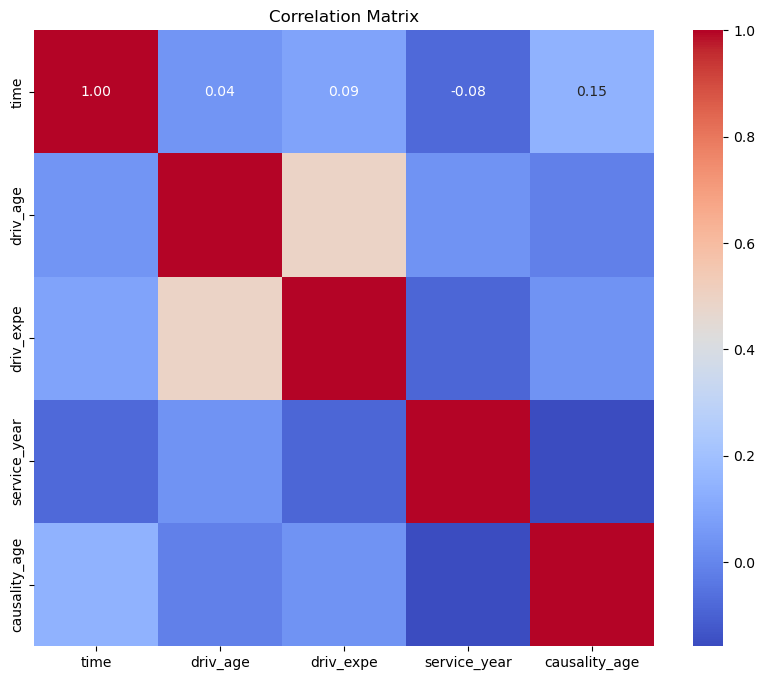

In [32]:
# Create a figure
plt.figure(figsize=(10, 8))

# Select only numeric columns
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix using the numeric DataFrame
correlation_matrix = numeric_df.corr()

# Plot the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

# 8. Feature Selection / Feature Engineering

In [33]:
# Load your data
#df = pd.read_excel('data.xlsx')
X = df.drop(columns=['severity'])
y = df['severity']
# Separate categorical and numerical features
#categorical_features = X.select_dtypes(include=['object', 'category']).columns
numerical_features = X.select_dtypes(include=['number']).columns

In [34]:
# Apply Chi-square for numerical features (assuming y is categorical)
chi2_selector = SelectKBest(chi2, k='all').fit(X[numerical_features], y)
chi2_scores = pd.Series(chi2_selector.scores_, index=numerical_features)

# Set a threshold and select top features
threshold = 0.5  # Example threshold; adjust as needed
top_features = chi2_scores[chi2_scores > threshold].sort_values(ascending=False)

print("Selected features:\n", top_features.index)
print("Chi-square Scores:\n", chi2_scores)

Selected features:
 Index(['causality_age', 'service_year', 'type_of_vehcle', 'casuality_class',
       'time'],
      dtype='object')
Chi-square Scores:
 time               0.885195
day                0.000154
driv_age           0.004783
sex                0.000437
driv_expe          0.014537
type_of_vehcle     0.925827
service_year       1.240602
location           0.229741
road_cond          0.296703
light_cond         0.230712
weather_cond       0.277266
casuality_class    0.886945
causality_age      2.105341
causality_sex      0.104022
dtype: float64


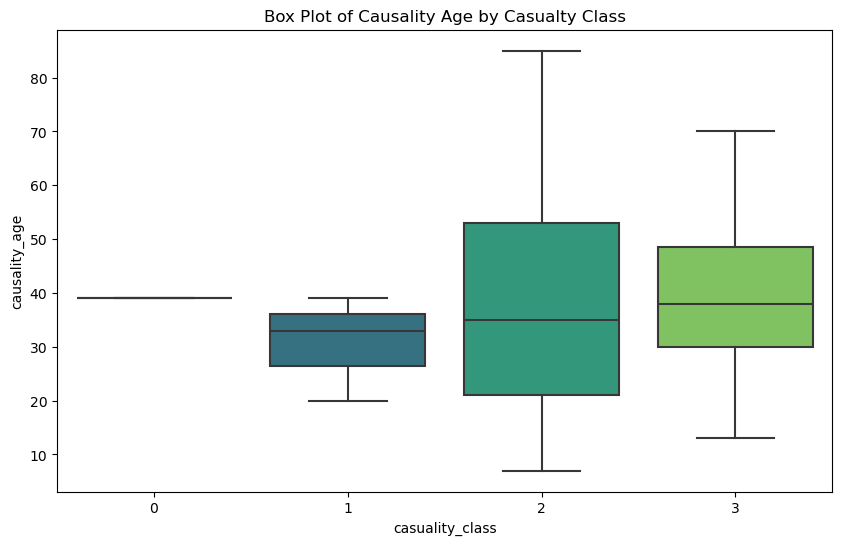

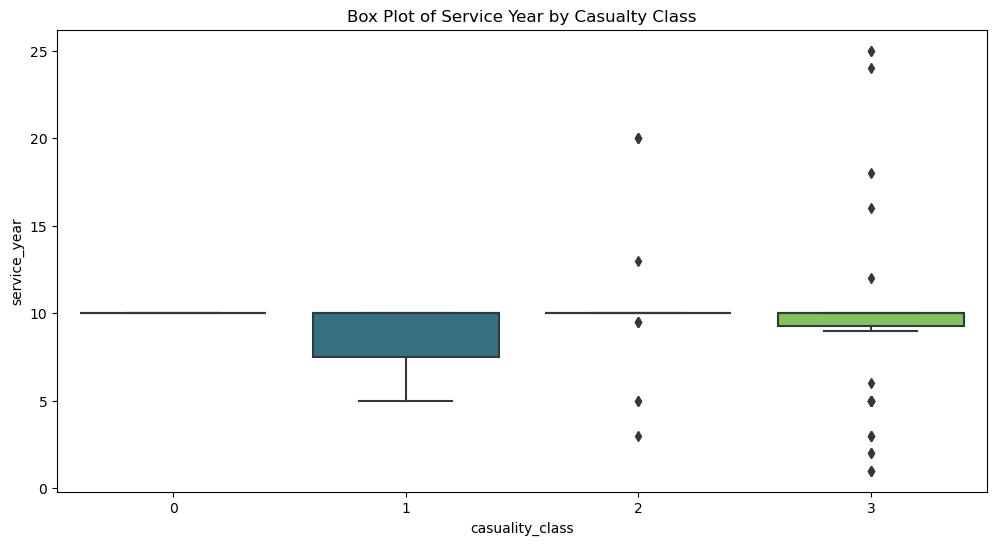

In [36]:
# Box Plot for 'causality_age' by 'casuality_class'
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='casuality_class', y='causality_age', palette='viridis')
plt.title('Box Plot of Causality Age by Casualty Class')
plt.show()

# Box Plot for 'service_year' by 'casuality_class'
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='casuality_class', y='service_year', palette='viridis')
plt.title('Box Plot of Service Year by Casualty Class')
plt.show()

